# Project To Identify Low-Risk Aircraft

## Project Goal

My project aims at determining the lowest risk aircraft to guide my company on which aircraft to purchase and operate.

## Data Source and Data Exploration

This data is downloaded from [github repository](https://github.com/learn-co-curriculum/dsc-phase-1-project-v3/blob/1c3ea4c2ac868f4467e6f55304b5713d40314c35/data/Aviation_Data.csv) and includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

I used 16 columns for my analysis including a calculated column which included variables about:
- Aircraft category, make and model
- Injuries due to aircraft accident and injury severity
- Aircraft damage after incident




In [18]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

In [19]:
#Loading the aviation dataset from the csv file into a pandas DataFrame

df = pd.read_csv("Aviation_Data.csv")
df.head() #displaying the first 5 rows of the DataFrame

C:\Users\mclivek\AppData\Local\Temp\ipykernel_26020\3592837602.py:3: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Aviation_Data.csv")


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [20]:
# Displaying the column names of the DataFrame

df.columns 

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

## Data Cleaning
I cleaned data by:

- Selecting relevant columns for analysis  
- Dropping rows with missing values and removing duplicates  
- Filtering dataset to only include the "Airplane" category  


In [21]:
# Choosing relevant columns for analysis

relevant_columns =  ["Aircraft.Category", "Make", "Model", "Injury.Severity", "Total.Fatal.Injuries", 
                     "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured", "Aircraft.damage",
                     "Number.of.Engines","Engine.Type", "Weather.Condition", "Broad.phase.of.flight",]
df_relevant = df[relevant_columns]


In [22]:
# Relevant DataFrame information
df_relevant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Aircraft.Category       32287 non-null  object 
 1   Make                    88826 non-null  object 
 2   Model                   88797 non-null  object 
 3   Injury.Severity         87889 non-null  object 
 4   Total.Fatal.Injuries    77488 non-null  float64
 5   Total.Serious.Injuries  76379 non-null  float64
 6   Total.Minor.Injuries    76956 non-null  float64
 7   Total.Uninjured         82977 non-null  float64
 8   Aircraft.damage         85695 non-null  object 
 9   Number.of.Engines       82805 non-null  float64
 10  Engine.Type             81793 non-null  object 
 11  Weather.Condition       84397 non-null  object 
 12  Broad.phase.of.flight   61724 non-null  object 
dtypes: float64(5), object(8)
memory usage: 9.0+ MB


In [23]:
# Handling missing values
df_relevant = df_relevant.dropna(how='any', axis=0)

In [24]:
# Dealing with Duplicate Entries
df_relevant.duplicated().sum()

np.int64(463)

In [25]:
# Removing duplicate entries
df_relevant = df_relevant.drop_duplicates()

In [26]:
# Filtering for relevant aircraft category "Airplane"
df_relevant = df_relevant[df_relevant["Aircraft.Category"] == "Airplane"]


In [27]:
# Saving a cleaned data csv file
df_relevant.to_csv("Cleaned_Aviation_Data.csv", index= False)

## Data Analysis and Visualization
This process involves:  
- Mapping Aircraft.damage to numeric scores
- Finding the correlation of variables
- Identified low-risk engine types and corresponding makes
- Calculating risk scores


Each analysis level is followed by a visualisation.


In [28]:
# Mapping Aircraft.damage to numerical scores

df_relevant["Aircraft.damage.score"] = df_relevant["Aircraft.damage"].map({"Minor": 1, "Substantial": 3, "Destroyed": 5})

In [29]:
# Correlation of variablbles.
df_relevant.corr(numeric_only=True)

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Number.of.Engines,Aircraft.damage.score
Total.Fatal.Injuries,1.000000,0.078459,0.015893,-0.046876,0.069867,0.433522
Total.Serious.Injuries,0.078459,1.000000,0.176253,0.038341,0.029135,0.173533
Total.Minor.Injuries,0.015893,0.176253,1.000000,0.190739,0.093767,-0.021268
Total.Uninjured,-0.046876,0.038341,0.190739,1.000000,0.330001,-0.171244
Number.of.Engines,0.069867,0.029135,0.093767,0.330001,1.000000,-0.118662
Aircraft.damage.score,0.433522,0.173533,-0.021268,-0.171244,-0.118662,1.000000


In [46]:
df_relevant.describe(include= "all")

,Aircraft.Category,Make,Model,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Aircraft.damage,Number.of.Engines,Engine.Type,Weather.Condition,Broad.phase.of.flight,Aircraft.damage.score,Risk.Score
count,2733,2733,2733,2733,2733.000000,2733.000000,2733.000000,2733.000000,2733,2733.000000,2733,2733,2733,2733.000000,2733.000000
unique,1,229,883,12,NaN,NaN,NaN,NaN,3,NaN,4,3,12,NaN,NaN
top,Airplane,Cessna,172,Non-Fatal,NaN,NaN,NaN,NaN,Substantial,NaN,Reciprocating,VMC,Landing,NaN,NaN
freq,2733,1042,55,2048,NaN,NaN,NaN,NaN,1736,NaN,2610,2381,624,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.457007,0.218075,0.311379,2.417124,NaN,1.182949,NaN,NaN,NaN,3.565679,1.475935
std,NaN,NaN,NaN,NaN,1.195434,0.689289,1.215447,14.866567,NaN,0.418516,NaN,NaN,NaN,1.067533,1.753146
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,NaN,NaN,3.000000,0.000000
50%,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,3.000000,0.000000
75%,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,2.000000,NaN,1.000000,NaN,NaN,NaN,5.000000,3.000000


### Business Question 1

### What Engine types (eg, Reciprocating, Turbo Fan) present the lowest overall passenger injury risk for commercial and private use?

In [30]:
#Identify the engine types with the highest number of uninjured passengers "low risk" engine types

df_relevant.groupby(["Engine.Type"]) ["Total.Uninjured"].sum()

Engine.Type
Reciprocating    2993.0
Turbo Fan        2691.0
Turbo Jet         556.0
Turbo Prop        366.0
Name: Total.Uninjured, dtype: float64

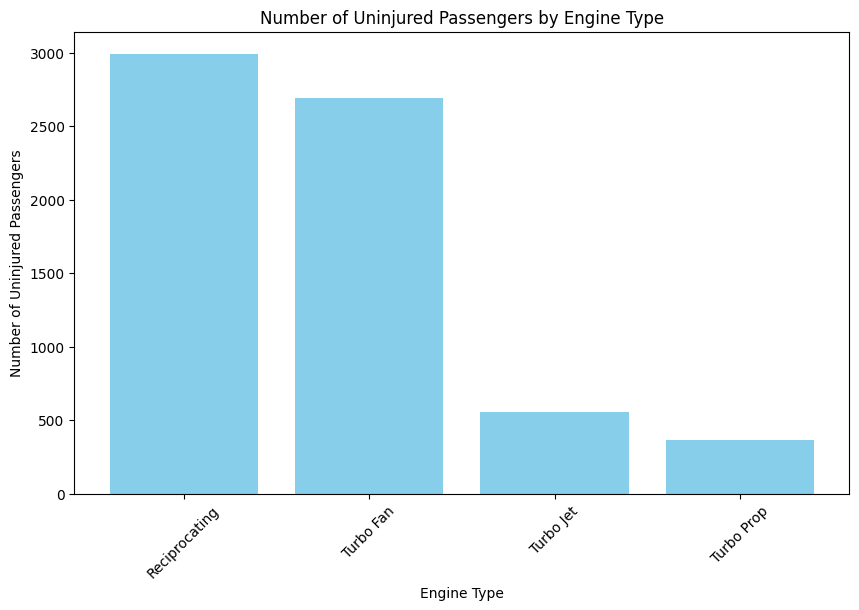

In [31]:
#Using a bar chart to visualize the number of uninjured passengers by engine type

Engine_Type_figure = plt.figure(figsize=(10,6))

plt.bar(df_relevant.groupby("Engine.Type")["Total.Uninjured"].sum().index,
        df_relevant.groupby("Engine.Type")["Total.Uninjured"].sum().values, color='skyblue')

plt.xlabel("Engine Type")   
plt.ylabel("Number of Uninjured Passengers")
plt.title("Number of Uninjured Passengers by Engine Type")
plt.xticks(rotation=45)
plt.show()

In [32]:
# Identifying makes with low risk engine types

Safe_Engine_df = df_relevant [(df_relevant ["Engine.Type"] == "Reciprocating") | 
                        (df_relevant ["Engine.Type"] == "Turbo Fan")]
Safe_Engine_Makes = Safe_Engine_df ["Make"].unique().tolist()


### Business Question 1 cont...

Reciprocating and Turbo Fan engines had the most uninjured passengers after incident therefore airplane makes using these engines are low risk.

I was able to identify makes using Reciprocating and Turbo Fan engines but the list is long and further analysis is needed to narrow it down.

### Business Question 2

### Which aircraft makes have the lowest historical overall risk?

In [33]:
# Calculating Risk Score column
#Using a weighted formula to calculate risk score

w_f = 10000 #weight for fatal injuries
w_s = 500 #weight for serious injuries
w_m = 50 #weight for minor injuries

weighted_sums = (w_f * df_relevant["Total.Fatal.Injuries"] +
                w_s * df_relevant["Total.Serious.Injuries"] +
                w_m * df_relevant["Total.Minor.Injuries"])

df_relevant["Risk.Score"] = np.log10(weighted_sums + 1).clip(upper=10).round(2)  # Adding 1 to avoid log(0)


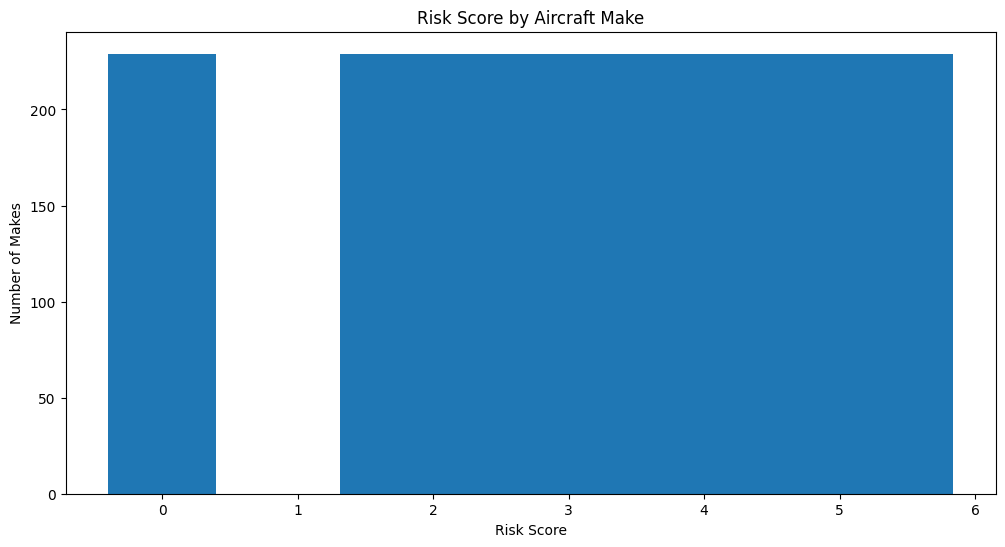

In [34]:
# Using a simple bar chart to visualize how different makes compare in terms of risk score

Risk_Score_figure, ax = plt.subplots(figsize=(12, 6))

ax.bar(df_relevant["Risk.Score"], df_relevant["Make"].nunique(),)
ax.set_xlabel("Risk Score")
ax.set_ylabel("Number of Makes")
ax.set_title("Risk Score by Aircraft Make")
plt.show()

In [35]:
# Identifying makes with zero risk score

Zero_Risk_df = df_relevant [df_relevant ["Risk.Score"] == 0]
Zero_Risk_Makes = Zero_Risk_df ["Make"].unique().tolist()


### Business Question 2 cont...

Majority of the airplane makes have a risk score of 0 and can be cosidered safe while a few are distributed within risk score of 1.6 to 5.6. I focused on makes with zero risk. 

I used the Aircraft.damge and Injury.Severity columns for further analysis to come up with the least risky airplane makes.

### Business Question 3

### Which aircraft makes present the lowest aircract damage and lowest injury severity after an incident?

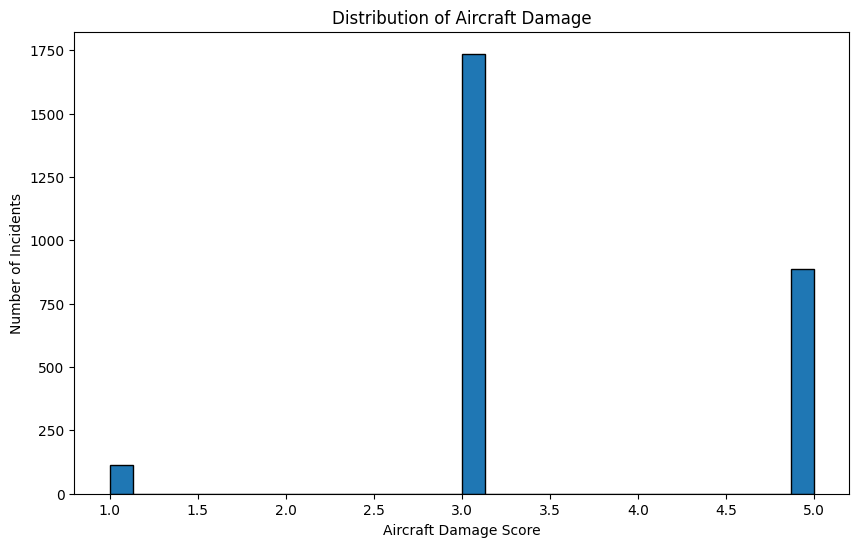

In [47]:
# Using a histogram to visualize the distribution of Aircraft damage
Damege_Figure, ax = plt.subplots(figsize=(10,6))

ax.hist(df_relevant["Aircraft.damage.score"], bins=30, edgecolor='black')
ax.set_xlabel("Aircraft Damage Score")
ax.set_ylabel("Number of Incidents")
ax.set_title("Distribution of Aircraft Damage")
plt.show()

### Business Question 3 cont...

In most incidences, aircraft damge was substantial(3) followed by destroyed(5). 

A few aircraft had minor(1) damage and this type of aircraft would be recommendable.

In [37]:
# Filter makes  whose damge is minor
Minor_Damage_df = df_relevant [df_relevant ["Aircraft.damage"] == "Minor"]
Minor_Damage_Makes = Minor_Damage_df ["Make"].unique().tolist()


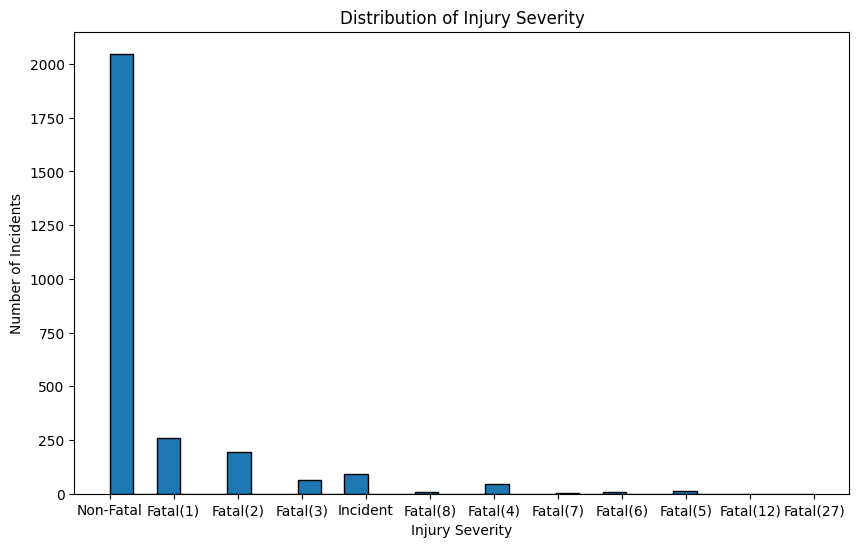

In [38]:
# Using a histogram to visualize the distribution of injury severity
Injury_Severity_Figure, ax = plt.subplots(figsize=(10,6))

ax.hist(df_relevant["Injury.Severity"], bins=30, edgecolor='black')
ax.set_xlabel("Injury Severity")
ax.set_ylabel("Number of Incidents")
ax.set_title("Distribution of Injury Severity")
plt.show()

In [39]:
# Filtering makes whose injury severity is Non-Fatal
Non_Fatal_Injury_df = df_relevant [df_relevant ["Injury.Severity"] == "Non-Fatal"]
Non_Fatal_Makes = Non_Fatal_Injury_df ["Make"].unique().tolist()

### Business Question 3 cont...

Using Injury Severity, we see most incidences were non-fatal. The makes that fall under this category would be recommendable.

### Combining all criteria to find recommended airplane makes

Aircraft makes to be recommended have to appear in these lists:
- Safe_Engine_Makes
- Zero_Risk_Makes
- Minor_Damage_Makes
- Non_Fatal_Makes

In [44]:
# Combining all criteria to recommend makes
Recommended_Makes = list(set(Safe_Engine_Makes) & set(Zero_Risk_Makes) & set(Minor_Damage_Makes) & set(Non_Fatal_Makes))

I was able to come up with a list of 16 airplane makes using safe engine, carry close to no risk, have minor aircraft damages and non-fatal injuries after incident.

Ranking these 16 makes would be helpful to see which ones are most recommendable. I ranked them according to average risk they carry.

In [41]:
# Ranking the recommended makes based on average risk score
Recommended_Makes_df = df_relevant[df_relevant["Make"].isin(Recommended_Makes)]
Average_Risk_Scores = Recommended_Makes_df.groupby("Make")["Risk.Score"].mean().sort_values(ascending= False)


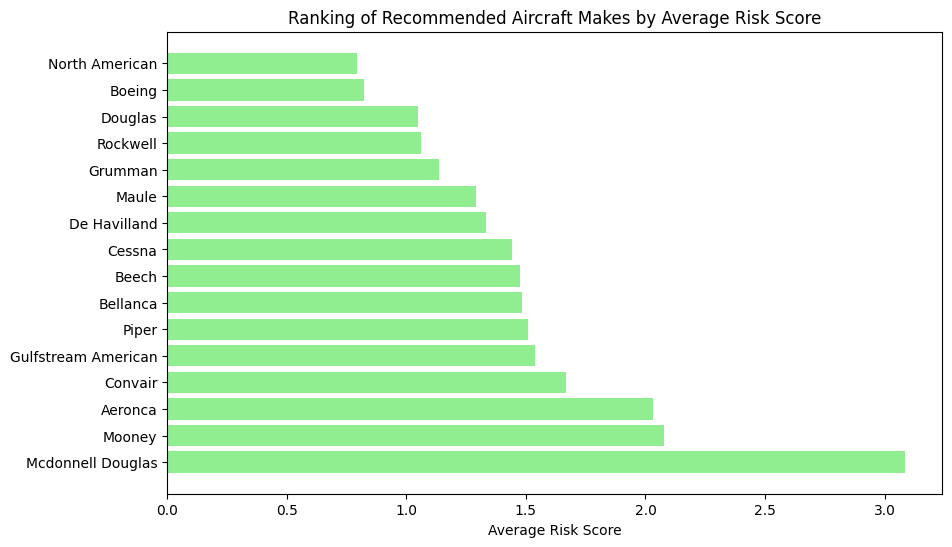

In [42]:
# Visualizing the ranking of recommended makes using a horizontal bar chart
Ranking_Figure, ax = plt.subplots(figsize=(10,6))

ax.barh(Average_Risk_Scores.index, Average_Risk_Scores.values, color='lightgreen')
ax.set_xlabel("Average Risk Score")
ax.set_title("Ranking of Recommended Aircraft Makes by Average Risk Score")
plt.show()

In [43]:
# A tuple of the top 10 recommended makes based on average risk score.
Average_Risk_Scores = Recommended_Makes_df.groupby("Make")["Risk.Score"].mean().sort_values(ascending= True)
Top_10_Recommended_Makes = tuple(Average_Risk_Scores.head(10).index)
Top_10_Recommended_Makes 


('North American',
 'Boeing',
 'Douglas',
 'Rockwell',
 'Grumman',
 'Maule',
 'De Havilland',
 'Cessna',
 'Beech',
 'Bellanca')

## Conclusion
The data was filtered so that aircraft type is 'airplanes'only as required by stake holders.
After data cleaning, analysis was carried out by creating four lists which determine the criteria by which recommendable makes would be filtered. The lists are:

- Safe_Engine_Makes - Contains airplane makes using Reciprocating or turbo Fan engines which present the least injuries after incident.
- Zero_Risk_Makes - Has airplane makes whose risk score is zero. Risk score is calculated out of 10 by factoring Total Fatal Injuries, Total Serios Injuries and Total Minor Injuries While giving highest weight to Total Fatal Injuries. 0 represents makes with no injury risk while 10 represents makes with very high injury risk.
- Minor_Damage_Makes - List shows the makes that have had Minor injuries after accident. 
- Non_Fatal_Makes - Has airplane makes in which there were no fatal injuries after an accident.

An airplane make that qualified to be recommended had to appear in all the four lists. There were 16 different makes that qualified which were the ranked according to their average risk and ten of them carrying the least risk were picked. The output is a tuple containing the name of these makes.